Possible Asteroid Impacts Data Analys

---

İdil Dilara Özmen

---


190503035


1)First i imported the libraries that i will be using through the analys. Then upload the csv files of the Possible Ateroid Impacts Datasets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

df_o= pd.read_csv("/content/orbits.csv")
df_i= pd.read_csv("/content/impacts.csv")
df_i

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
...,...,...,...,...,...,...,...,...,...,...,...
678,2014 KW76,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22,0
679,2012 FN,2115,2115,1,2.300000e-08,3.27,29.2,0.005,-10.18,-10.20,0
680,101955 Bennu (1999 RQ36),2175,2199,78,3.700000e-04,5.99,20.2,0.490,-1.71,-2.32,(*)
681,410777 (2009 FD),2185,2198,7,1.600000e-03,15.87,22.1,0.160,-1.78,-1.83,(*)


2)I checked the types and null values of the impact data.

In [3]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


3)I examined the properties of the columns using the describe() function

In [4]:
df_i.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


4)I checked if there is an object written twice and removed duplicates from the dataframe.

In [5]:
df_i['Object Name'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
678    False
679    False
680    False
681    False
682    False
Name: Object Name, Length: 683, dtype: bool

In [6]:
df_i['Object Name'].drop_duplicates()

0                      2006 WP1
1                       2013 YB
2                       2008 US
3                    2010 VR139
4                    2015 ME131
                 ...           
678                   2014 KW76
679                     2012 FN
680    101955 Bennu (1999 RQ36)
681            410777 (2009 FD)
682             29075 (1950 DA)
Name: Object Name, Length: 683, dtype: object

5)Since the (*) value in the last three rows of the Maximum Torino Scale column stood out in the dataframe output, I found the value count of the column. Then i removed them.

In [7]:
df_i["Maximum Torino Scale"].value_counts()

0      680
(*)      3
Name: Maximum Torino Scale, dtype: int64

In [8]:
df_i2 =df_i.replace('(*)' , np.nan)
df_i2


,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
...,...,...,...,...,...,...,...,...,...,...,...
678,2014 KW76,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22,0
679,2012 FN,2115,2115,1,2.300000e-08,3.27,29.2,0.005,-10.18,-10.20,0
680,101955 Bennu (1999 RQ36),2175,2199,78,3.700000e-04,5.99,20.2,0.490,-1.71,-2.32,NaN
681,410777 (2009 FD),2185,2198,7,1.600000e-03,15.87,22.1,0.160,-1.78,-1.83,NaN


In [9]:
dfi_nan = df_i2.dropna()
dfi_nan

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
...,...,...,...,...,...,...,...,...,...,...,...
675,2016 FV13,2114,2114,1,2.000000e-05,11.06,25.9,0.023,-5.44,-5.44,0
676,2015 DD54,2114,2114,1,2.600000e-06,6.70,25.4,0.028,-6.25,-6.25,0
677,2015 EG,2115,2115,1,3.400000e-08,9.56,25.7,0.025,-8.15,-8.15,0
678,2014 KW76,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22,0


6)Since I had nothing to do with the object name column, I removed it.

In [10]:
#dfi_nan = dfi_nan.drop('Object Name', axis=1, inplace=True)
dfi_wo_on = dfi_nan.copy()
dfi_wo_on.drop(['Object Name'], axis=1, inplace=True)
dfi_wo_on


,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
...,...,...,...,...,...,...,...,...,...,...
675,2114,2114,1,2.000000e-05,11.06,25.9,0.023,-5.44,-5.44,0
676,2114,2114,1,2.600000e-06,6.70,25.4,0.028,-6.25,-6.25,0
677,2115,2115,1,3.400000e-08,9.56,25.7,0.025,-8.15,-8.15,0
678,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22,0


7)I used a heat map to see the overall density of the data

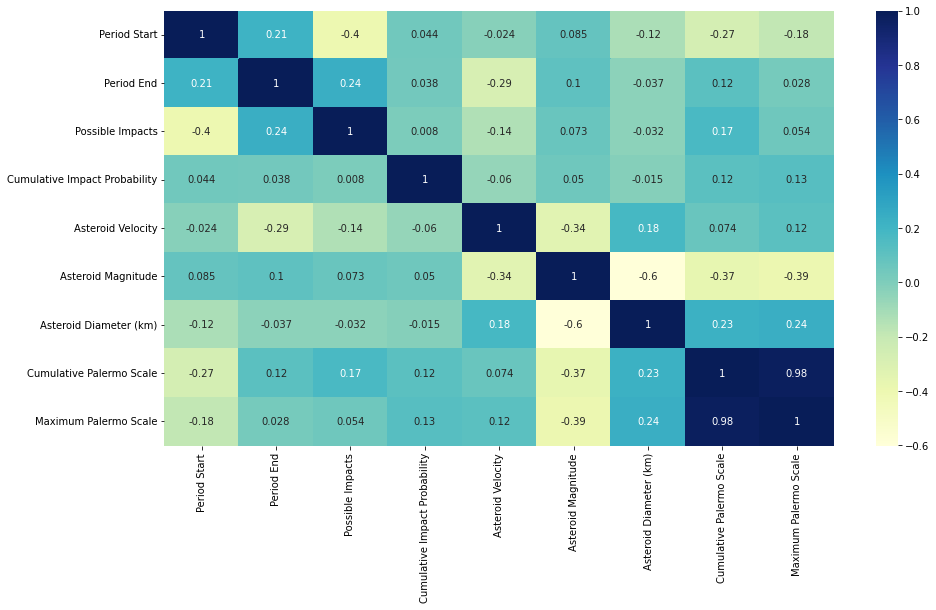

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(dfi_wo_on.corr(), annot=True, cmap="YlGnBu")
plt.show()

8)Since I had some difficulties to subplot using axes, I created a violin chart for all columns, which is the most logical chart type to use when considering each column.

In [12]:
impact_features = dfi_wo_on.columns
impact_features

Index(['Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

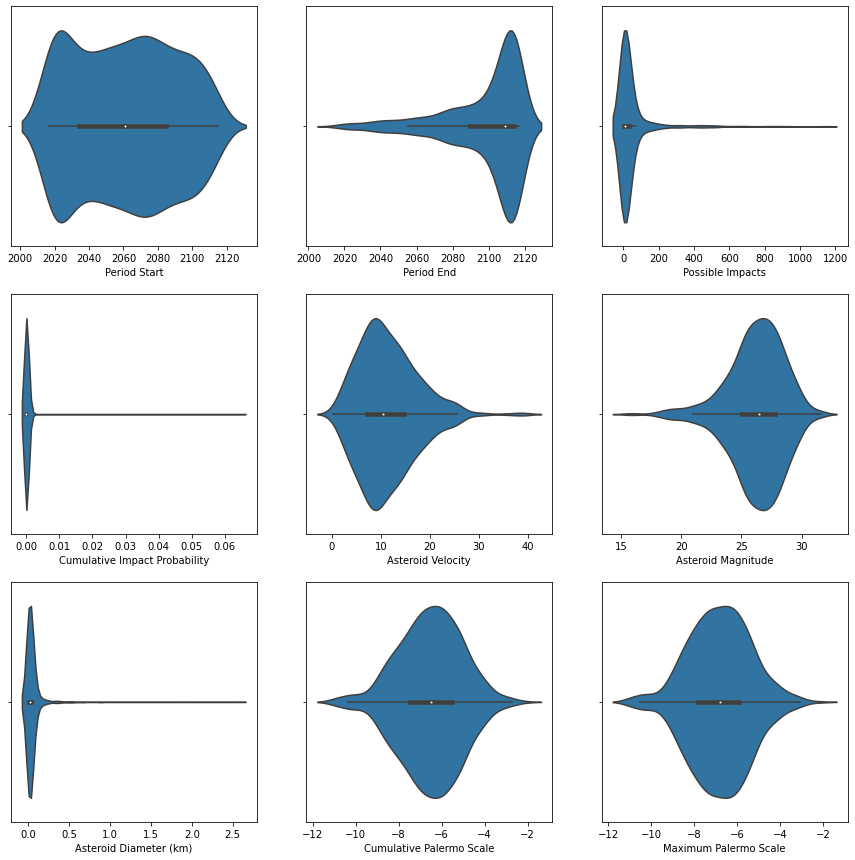

In [13]:
#period=sns.violinplot(dfi_wo_on["Period End"])
#plt.show()

feat = 0

    # Create the boxplot
fig, ax = plt.subplots(nrows=int(len(impact_features)/3), ncols=3, figsize=(15, 15))
for i in range(int(len(impact_features)/3)):
    for j in range(3):
        sns.violinplot(x=impact_features[feat], data=dfi_wo_on, ax=ax[i][j])
        feat += 1
plt.show()

9)To see the physical properties of asteroids, I created three graphs showing their velocity, magnitude and diameter.

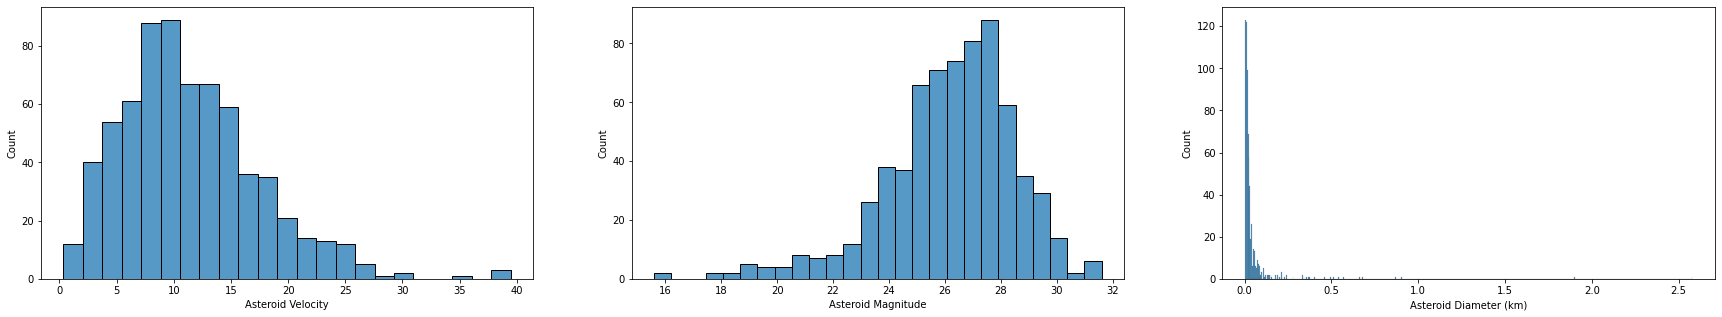

In [14]:
fig, axes = plt.subplots(1, 3 , figsize=(30,5))
sns.histplot(x = 'Asteroid Velocity', data = dfi_wo_on, ax = axes[0])
sns.histplot(x = 'Asteroid Magnitude', data = dfi_wo_on, ax = axes[1])
sns.histplot(x = 'Asteroid Diameter (km)', data = dfi_wo_on, ax=axes[2])

10)"The Palermo Technical Impact Hazard Scale was developed to enable NEO specialists to categorize and prioritize potential impact risks spanning a wide range of impact dates, energies and probabilities. Actual scale values less than -2 reflect events for which there are no likely consequences, while Palermo Scale values between -2 and 0 indicate situations that merit careful monitoring. Potential impacts with positive Palermo Scale values will generally indicate situations that merit some level of concern." 
So I created a scatter plot comparing impact probability and asteroid magnitude.

In [15]:
dfi1=dfi_wo_on.copy()
dfi1 = dfi1.rename(columns = {"Asteroid Magnitude":"x"})
dfi1 = dfi1.rename(columns = {"Cumulative Palermo Scale":"y"})

[Text(0, 0.5, 'Cumulative Palermo Scale'),
 Text(0.5, 0, 'Asteroid Magnitude'),
 Text(0.5, 1.0, 'Cumulative Palermo Scale According To Asteriod Sizes')]

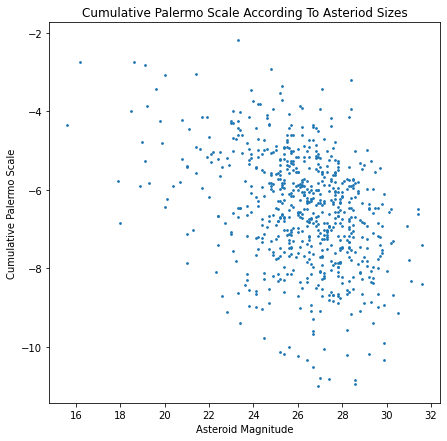

In [16]:
fig, ax=plt.subplots(figsize=(7,7))
plt.scatter(dfi1.x, dfi1.y, alpha =1,s=3)
ax.set(title="Cumulative Palermo Scale According To Asteriod Sizes", xlabel="Asteroid Magnitude",ylabel="Cumulative Palermo Scale")



11) Then I made a lineplot showing the probabilities of impact, taking into account the velocity and magnitude, but I marked the fit_reg boolean value as false because it gives a more understandable.

Text(0.5, 1.0, 'Pink is highly probable and Blue is not')

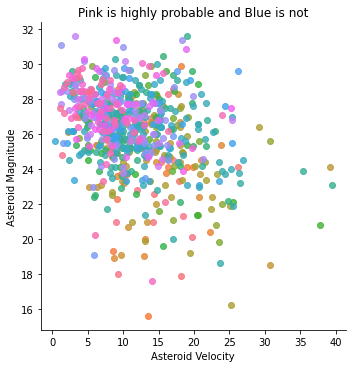

In [61]:
sns.lmplot(x='Asteroid Velocity', y='Asteroid Magnitude', hue='Cumulative Impact Probability',
           legend=False, data=df_i, fit_reg=False)
plt.title('Pink is highly probable and Blue is not')


12) Then I started analyzing the orbit data.

In [17]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

13) Since there is a nan value in the Asteroid Magnitude column, I removed the row containing this value from the data frame.

In [18]:
df_o.dropna(inplace=True)
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15634 non-null  object 
 1   Object Classification                     15634 non-null  object 
 2   Epoch (TDB)                               15634 non-null  int64  
 3   Orbit Axis (AU)                           15634 non-null  float64
 4   Orbit Eccentricity                        15634 non-null  float64
 5   Orbit Inclination (deg)                   15634 non-null  float64
 6   Perihelion Argument (deg)                 15634 non-null  float64
 7   Node Longitude (deg)                      15634 non-null  float64
 8   Mean Anomoly (deg)                        15634 non-null  float64
 9   Perihelion Distance (AU)                  15634 non-null  float64
 10  Aphelion Distance (AU)            

14) I removed the Object Name column as it was in the Impact data as it was not useful.

In [19]:
df_o.drop(['Object Name'], axis=1, inplace=True)
df_o.columns

Index(['Object Classification', 'Epoch (TDB)', 'Orbit Axis (AU)',
       'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude'],
      dtype='object')

15) I used the describe method again to look at the general information of the columns.

In [20]:
df_o.describe()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
count,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000
mean,57365.532749,1.781012,0.449703,12.939206,181.499448,172.680946,172.838928,0.914899,2.647120,2.473433,0.101881,21.886210,22.286336
std,1167.148181,0.603247,0.176002,11.300910,103.858105,103.381604,116.125667,0.240310,1.142688,1.517633,0.105940,33.632956,3.016002
min,44221.000000,0.547600,0.004400,0.014700,0.008100,0.007000,0.003100,0.070700,0.800000,0.410000,0.000000,1.000000,9.450000
25%,57800.000000,1.323600,0.322725,4.762175,92.432975,82.248100,62.030375,0.776725,1.740000,1.520000,0.018700,6.000000,19.900000
50%,57800.000000,1.735500,0.462950,9.196350,183.300400,172.180350,167.750600,0.965800,2.520000,2.290000,0.062000,11.000000,22.200000
75%,57800.000000,2.208675,0.572900,18.508175,270.908350,253.664375,281.445200,1.080300,3.420000,3.280000,0.159175,23.000000,24.600000
max,57800.000000,21.395400,0.969500,154.375100,359.994200,359.998100,359.998200,1.300000,41.540000,98.970000,0.706900,635.000000,33.200000


16) Then I also created a heat map for Orbit data too.

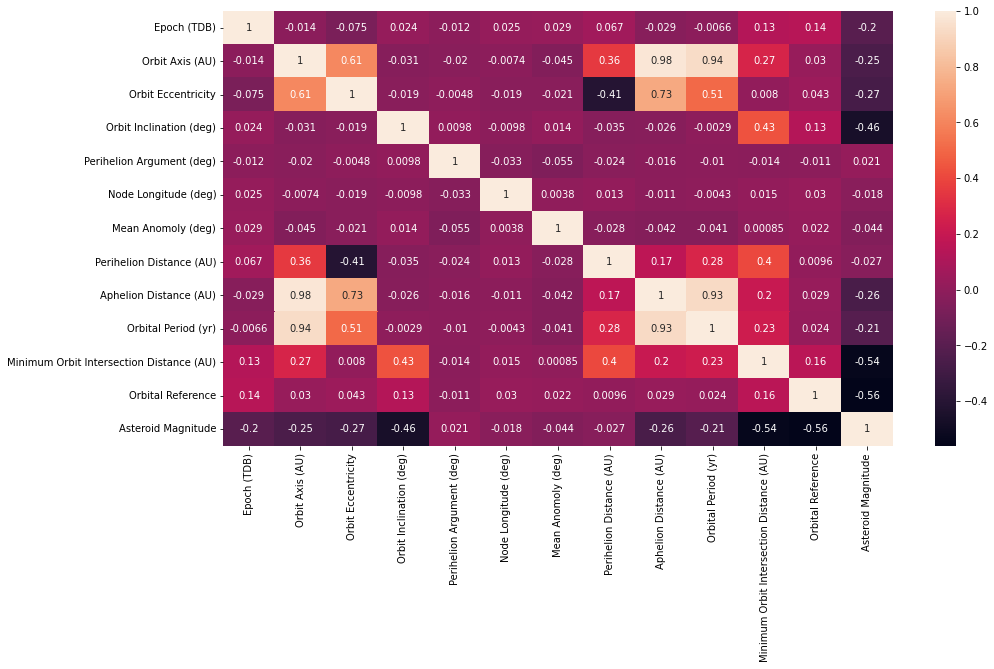

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_o.corr(), annot=True)
plt.show()

17) "An epoch or reference epoch is an instant in time chosen as the origin of a particular calendar era. " I created a distplot showing the epoch values of the asteroids. The red line represents the average value.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


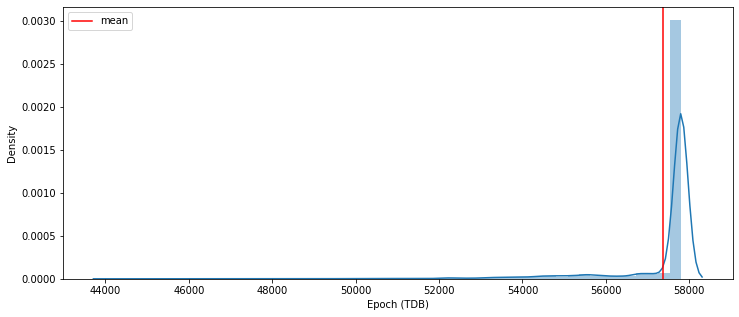

In [22]:
plt.figure(figsize=(12, 5))
sns.distplot(df_o["Epoch (TDB)"])
plt.axvline(df_o["Epoch (TDB)"].mean(), color='r', label="mean")
plt.legend()
plt.show()

18) Since it does not contain a measurable value, I created a new duplicate data frame and removed the Object Classification column.

In [43]:
df_wo_oc=df_o.copy()
df_wo_oc.drop(['Object Classification'], axis=1, inplace=True)
df_wo_oc.columns

Index(['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude'],
      dtype='object')

In [44]:
orbit_features = list(df_wo_oc.columns)
orbit_features

['Epoch (TDB)',
 'Orbit Axis (AU)',
 'Orbit Eccentricity',
 'Orbit Inclination (deg)',
 'Perihelion Argument (deg)',
 'Node Longitude (deg)',
 'Mean Anomoly (deg)',
 'Perihelion Distance (AU)',
 'Aphelion Distance (AU)',
 'Orbital Period (yr)',
 'Minimum Orbit Intersection Distance (AU)',
 'Orbital Reference',
 'Asteroid Magnitude']

19) Using the same method, I created a violin plot for the orbit data.

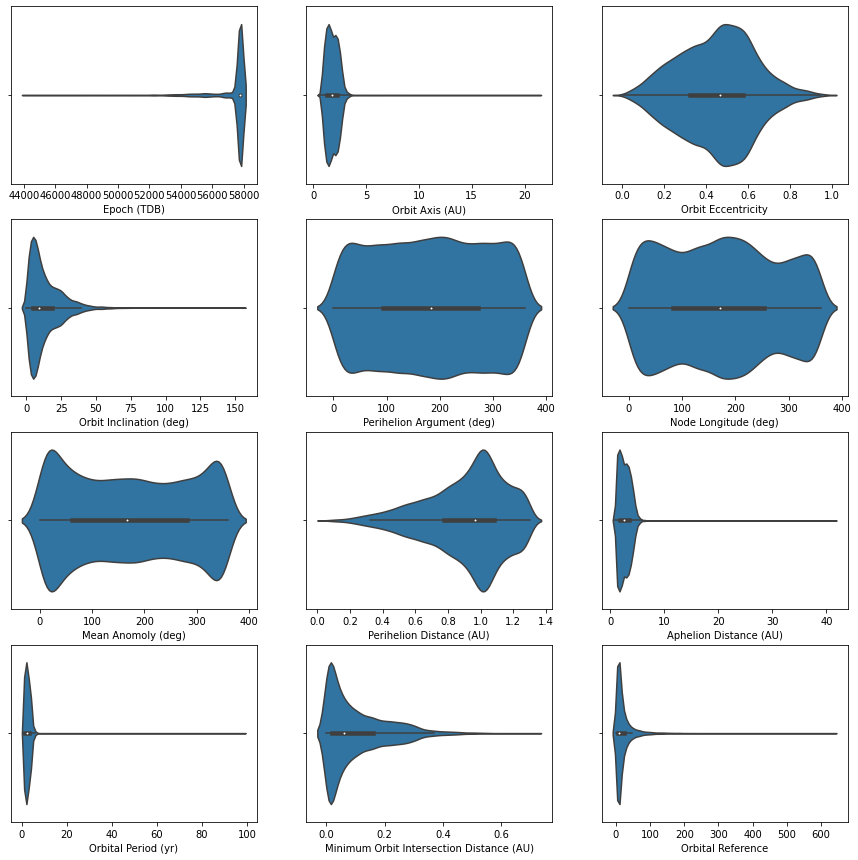

In [45]:
feat1 = 0

   
fig, ax = plt.subplots(nrows=int(len(orbit_features)/3), ncols=3, figsize=(15, 15))
for i in range(int(len(orbit_features)/3)):
    for j in range(3):
        sns.violinplot(x=orbit_features[feat1], data=df_wo_oc, ax=ax[i][j])
        feat1 += 1
plt.show()

20) I created a new data frame consisting of only the columns I will use for convenience in the chart I will create later.

In [25]:
df_ec=pd.DataFrame()
df_ec.insert(0,'Object Classification', df_o['Object Classification'])
df_ec.insert(1,'Orbit Eccentricity', df_o['Orbit Eccentricity'])
df_ec

,Object Classification,Orbit Eccentricity
0,Amor Asteroid,0.2226
1,Amor Asteroid,0.5479
2,Amor Asteroid,0.5671
3,Amor Asteroid,0.5338
4,Amor Asteroid,0.4356
...,...,...
15630,Apollo Asteroid,0.2946
15631,Amor Asteroid,0.4429
15632,Amor Asteroid,0.3275
15633,Apollo Asteroid,0.4646


In [26]:
df_ec["Object Classification"].value_counts()

Apollo Asteroid              6940
Amor Asteroid                5917
Apollo Asteroid (Hazard)     1520
Aten Asteroid                 987
Aten Asteroid (Hazard)        155
Amor Asteroid (Hazard)         99
Apohele Asteroid               11
Apohele Asteroid (Hazard)       5
Name: Object Classification, dtype: int64

21) I have categorized the Object Classification column to sort by different asteroid types.

In [27]:
objcat=df_ec["Object Classification"].astype('category')
objcat

0                   Amor Asteroid
1                   Amor Asteroid
2                   Amor Asteroid
3                   Amor Asteroid
4                   Amor Asteroid
                   ...           
15630             Apollo Asteroid
15631               Amor Asteroid
15632               Amor Asteroid
15633             Apollo Asteroid
15634    Apollo Asteroid (Hazard)
Name: Object Classification, Length: 15634, dtype: category
Categories (8, object): ['Amor Asteroid', 'Amor Asteroid (Hazard)', 'Apohele Asteroid',
                         'Apohele Asteroid (Hazard)', 'Apollo Asteroid', 'Apollo Asteroid (Hazard)',
                         'Aten Asteroid', 'Aten Asteroid (Hazard)']

22) I divided the categories into subdfs to use them more easily while creating the graph.

In [28]:
dfs_by_cat = {
   accepted: sub_df
   for accepted, sub_df in df_ec.groupby("Object Classification")
}
dfs_by_cat

{'Amor Asteroid':       Object Classification  Orbit Eccentricity
 0             Amor Asteroid              0.2226
 1             Amor Asteroid              0.5479
 2             Amor Asteroid              0.5671
 3             Amor Asteroid              0.5338
 4             Amor Asteroid              0.4356
 ...                     ...                 ...
 15618         Amor Asteroid              0.3541
 15621         Amor Asteroid              0.5697
 15623         Amor Asteroid              0.5371
 15631         Amor Asteroid              0.4429
 15632         Amor Asteroid              0.3275
 
 [5917 rows x 2 columns],
 'Amor Asteroid (Hazard)':         Object Classification  Orbit Eccentricity
 38     Amor Asteroid (Hazard)              0.4230
 55     Amor Asteroid (Hazard)              0.4455
 120    Amor Asteroid (Hazard)              0.5907
 261    Amor Asteroid (Hazard)              0.5069
 266    Amor Asteroid (Hazard)              0.4920
 ...                       ...     

23) I changed the names of the subdfs.

In [29]:
amor= dfs_by_cat["Amor Asteroid"]
amorh= dfs_by_cat["Amor Asteroid (Hazard)"]
apohele=dfs_by_cat["Apohele Asteroid"]
apoheleh=dfs_by_cat["Apohele Asteroid (Hazard)"]
apollo=dfs_by_cat["Apollo Asteroid"]
apolloh=dfs_by_cat["Apollo Asteroid (Hazard)"]
aten=dfs_by_cat["Aten Asteroid"]
atenh=dfs_by_cat["Aten Asteroid (Hazard)"]



24) I then showed the Orbit Eccentricity data in a bar graph, with different asteroid types represented by different colors.

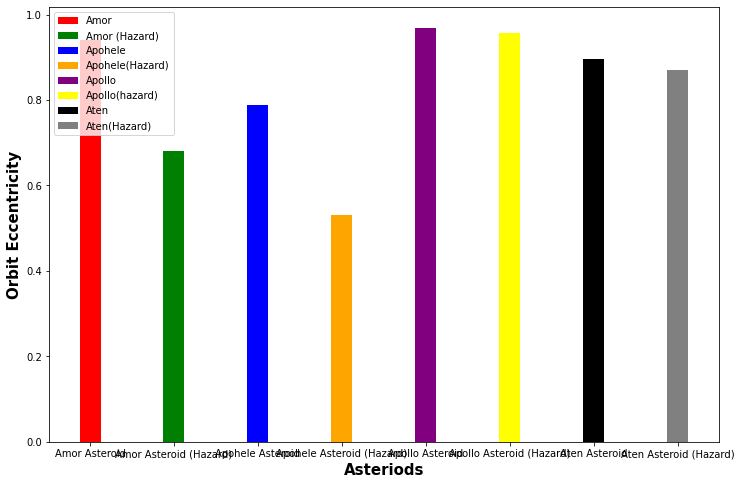

In [34]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


plt.bar(amor['Object Classification'],amor['Orbit Eccentricity'], color ='r', width = barWidth,label ='Amor')
plt.bar(amorh['Object Classification'],amorh['Orbit Eccentricity'], color ='g', width = barWidth, label ='Amor (Hazard)')
plt.bar(apohele['Object Classification'],apohele['Orbit Eccentricity'] ,color ='b', width = barWidth, label ='Apohele')
plt.bar(apoheleh['Object Classification'],apoheleh['Orbit Eccentricity'] , color ='orange', width = barWidth, label ='Apohele(Hazard)')
plt.bar(apollo['Object Classification'],apollo['Orbit Eccentricity'], color ='purple', width = barWidth, label ='Apollo')
plt.bar(apolloh['Object Classification'],apolloh['Orbit Eccentricity'], color ='yellow', width = barWidth, label ='Apollo(hazard)')
plt.bar(aten['Object Classification'],aten['Orbit Eccentricity'] ,color ='black', width = barWidth, label ='Aten')
plt.bar(atenh['Object Classification'],atenh['Orbit Eccentricity'] ,color ='grey', width = barWidth, label ='Aten(Hazard)')

plt.xlabel('Asteriods', fontweight ='bold', fontsize = 15)
plt.ylabel('Orbit Eccentricity', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()



25) Finally, I tried to show Orbit Axis, Mean Anomaly and Orbit Inclination data with three-dimensional scatterplot.

Text(0.5, 0.92, 'Orbit Inclination')

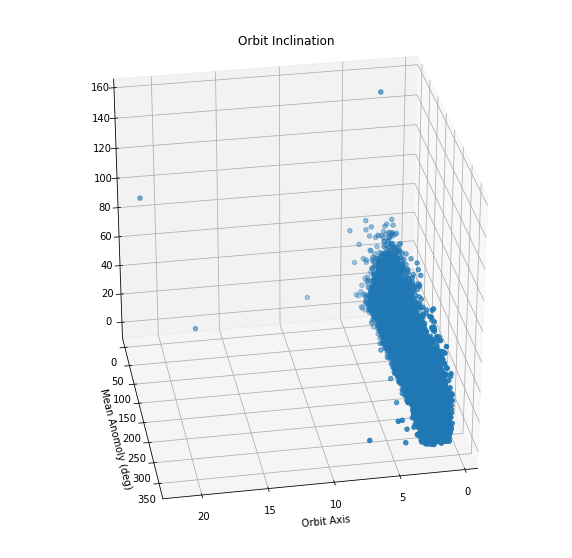

In [57]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x, y, z = df_o['Orbit Axis (AU)'], df_o['Mean Anomoly (deg)'], df_o['Orbit Inclination (deg)']
ax.scatter(x, y, z)
ax.view_init(30, 80)
plt.xlabel('Orbit Axis')
plt.ylabel('Mean Anomoly (deg)')
plt.title('Orbit Inclination')